In [79]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
#데이터 불러오기

user = pd.read_csv('C:/Users/DaBin/Desktop/Python/DATA/기로그/raw data/user_100.csv')
data = pd.read_csv('C:/Users/DaBin/Desktop/Python/DATA/기로그/raw data/memory_100.csv')

In [81]:
user.head()

,USER_ID,MY_INVITE_CODE,OTHER_INVITE_CODE,RELATE_SNS_ACCOUNT,AUTH_MEMO,BIRTH_DATE,EVENT_MEMORY_COUNT,ROLE,UNIQUE_ID,PASSWORD,EMAIL,NICKNAME,PROMO_AGREE_DATE,BEAN_BALANCE,I_DATE,U_DATE,USE_YN
0,952,NaN,NaN,AA001,NaN,1974-03-28 15:00:00,1,AB002,3135914902,NaN,NaN,Klug,0000-00-00 00:00:00,0,2023-10-27 04:47:03,2023-10-27 04:47:03,1
1,951,NaN,NaN,AA001,NaN,1987-12-01 00:00:00,1,AB002,NaN,NaN,NaN,특별소,0000-00-00 00:00:00,0,2023-10-27 02:48:54,2023-10-27 02:52:02,0
2,950,NaN,NaN,AA001,NaN,2023-08-26 15:00:00,0,AB002,3135034430,NaN,NaN,준영이,0000-00-00 00:00:00,0,2023-10-26 11:52:38,2023-10-26 11:52:38,1
3,949,NaN,NaN,AA002,NaN,1986-02-24 05:00:00,0,AB002,001447.c32b45b55f8445a5b984b7d6b4ca431f.0924,NaN,NaN,니루,0000-00-00 00:00:00,0,2023-10-26 09:24:24,2023-10-26 09:24:24,1
4,948,NaN,NaN,AA002,NaN,1989-10-05 06:00:00,0,AB002,000938.0c509500eace4c609978b756f362d7ea.1349,NaN,NaN,노력,0000-00-00 00:00:00,0,2023-10-25 13:50:01,2023-10-25 13:50:01,1


# PREPROCESSING

In [82]:
#필요한 feature 만 선택

user = user[["USER_ID","EVENT_MEMORY_COUNT","NICKNAME","I_DATE","U_DATE","USE_YN"]]
data = data[['MEMORY_ID','WRITER','MEMORY_DATE','IS_PRINTED','I_DATE','U_DATE','USE_YN','QUESTION']]

In [83]:
#작성횟수 피처 추가
data2 = pd.DataFrame(data.groupby('WRITER')['USE_YN'].count().sort_values())

data_new = pd.merge(data,data2, how='left',on='WRITER').drop('USE_YN_x',axis = 1)

In [84]:
#칼럼명 수정

data_new.rename(columns = {'USE_YN_y' : 'count'},inplace = True)

In [85]:
#수정된 데이터 data_new 확인

data_new.head()

,MEMORY_ID,WRITER,MEMORY_DATE,IS_PRINTED,I_DATE,U_DATE,QUESTION,count
0,4013,461,2023-10-03 00:00:00,0,2023-10-27 06:08:36,2023-10-27 06:08:36,608,4
1,4012,461,2023-10-26 00:00:00,0,2023-10-27 06:06:38,2023-10-27 06:06:38,631,4
2,4011,914,2023-10-27 00:00:00,0,2023-10-27 05:56:23,2023-10-27 05:56:23,309,5
3,4010,914,2023-10-26 00:00:00,0,2023-10-27 05:54:41,2023-10-27 05:54:41,308,5
4,4009,914,2023-10-25 00:00:00,0,2023-10-27 05:53:38,2023-10-27 05:53:38,307,5


## data csv 살펴보기

In [86]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MEMORY_ID    100 non-null    int64 
 1   WRITER       100 non-null    int64 
 2   MEMORY_DATE  100 non-null    object
 3   IS_PRINTED   100 non-null    int64 
 4   I_DATE       100 non-null    object
 5   U_DATE       100 non-null    object
 6   QUESTION     100 non-null    int64 
 7   count        100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


### 1) 작성 기간/횟수 - `MEMORY_DATE` 

In [87]:
#3일내에 5회 이상 작성한 writer 확인

most_writer = data_new.groupby('WRITER')['count'].count()
most_writer = most_writer[most_writer >= 5]
most_index = ['184','537','568','603','687','714','914']

most_writer

WRITER
184     6
537    10
568     5
603     5
687     9
714     5
914     5
Name: count, dtype: int64

In [88]:
#writer 변수 수정
writer_list = pd.read_csv('C:/Users/DaBin/Desktop/Python/DATA/기로그/raw data/memory_10.csv')

data_new['WRITER'] = writer_list
data_new['WRITER'] = data['WRITER'].astype(str)

data_new.MEMORY_DATE = [x[:10] for x in data_new.MEMORY_DATE ]

In [89]:
#datetime 변경 및 상위 작성자 분류

from datetime import datetime


data_new['MEMORY_DATE'] = [datetime.strptime(x,'%Y-%m-%d') for x in data_new['MEMORY_DATE']]

writer_5 = data_new[(data_new.WRITER == '184') | (data_new.WRITER == '537') | (data_new.WRITER == '568') | (data_new.WRITER == '603') | (data_new.WRITER == '687')
                | (data_new.WRITER == '714') | (data_new.WRITER == '914')]



#### (1) `MEMORT DATE`와 `I_DATE`

* 상위작성자 별 `MEMORY_DATE`와 `I_DATE` 비교

In [90]:
writer_5.groupby('WRITER')[['I_DATE','MEMORY_DATE']].min()

,I_DATE,MEMORY_DATE
WRITER,,
184,2023-10-24 13:05:04,2023-10-21
537,2023-10-26 10:02:15,2023-10-16
568,2023-10-24 15:39:34,2023-10-21
603,2023-10-24 14:38:51,2023-10-21
687,2023-10-24 13:54:13,2023-10-15
714,2023-10-24 15:15:53,2023-10-10
914,2023-10-27 05:51:07,2023-10-23


* 하위 8명의 `MEMORY_DATE`와 `I_DATE` 비교 : 상위 데이터에 비해 차이가 적음

In [91]:
data_new.groupby('WRITER')['count'].count().sort_values(ascending = True)[:8]

WRITER
952    1
890    1
713    1
951    1
659    1
808    1
473    1
28     1
Name: count, dtype: int64

In [92]:
writer_8 = data_new[(data_new.WRITER == '952') | (data_new.WRITER == '890') | (data_new.WRITER == '713') | (data_new.WRITER == '951') | (data_new.WRITER == '659')
                | (data_new.WRITER == '808') | (data_new.WRITER == '473')| (data_new.WRITER == '23')]

writer_8.groupby('WRITER')[['I_DATE','MEMORY_DATE']].min()

,I_DATE,MEMORY_DATE
WRITER,,
473,2023-10-24 20:22:17,2023-10-24
659,2023-10-24 14:09:39,2023-10-24
713,2023-10-24 21:27:52,2023-10-24
808,2023-10-24 09:47:05,2023-10-24
890,2023-10-27 04:11:23,2023-10-26
951,2023-10-26 17:50:34,2023-10-27
952,2023-10-27 04:50:19,2023-10-27


* 전체 데이터 중 가장 과거의 `MEMORY_DATE`

In [93]:
data_new[data_new.MEMORY_DATE == data_new['MEMORY_DATE'].min()]

,MEMORY_ID,WRITER,MEMORY_DATE,IS_PRINTED,I_DATE,U_DATE,QUESTION,count
0,4013,461,2023-10-03,0,2023-10-27 06:08:36,2023-10-27 06:08:36,608,4


In [94]:
data_new[data_new['WRITER'] == '461']

,MEMORY_ID,WRITER,MEMORY_DATE,IS_PRINTED,I_DATE,U_DATE,QUESTION,count
0,4013,461,2023-10-03,0,2023-10-27 06:08:36,2023-10-27 06:08:36,608,4
1,4012,461,2023-10-26,0,2023-10-27 06:06:38,2023-10-27 06:06:38,631,4
8,4005,461,2023-10-19,0,2023-10-27 04:48:50,2023-10-27 04:48:50,624,4
58,3955,461,2023-10-17,0,2023-10-25 05:44:00,2023-10-25 05:44:00,622,4


* 가장 많은 기록을 한 WRITER -> 매일 기록

In [95]:
data_new[data_new['WRITER'] == '537'].sort_values(by = 'MEMORY_DATE')

,MEMORY_ID,WRITER,MEMORY_DATE,IS_PRINTED,I_DATE,U_DATE,QUESTION,count
30,3983,537,2023-10-16,0,2023-10-26 10:07:47,2023-10-26 10:07:47,489,10
31,3982,537,2023-10-17,0,2023-10-26 10:06:12,2023-10-26 10:06:12,490,10
27,3986,537,2023-10-18,0,2023-10-26 10:13:39,2023-10-26 10:13:39,491,10
32,3981,537,2023-10-19,0,2023-10-26 10:04:51,2023-10-26 10:04:51,492,10
28,3985,537,2023-10-20,0,2023-10-26 10:11:25,2023-10-26 10:11:25,493,10
29,3984,537,2023-10-21,0,2023-10-26 10:09:13,2023-10-26 10:09:13,494,10
33,3980,537,2023-10-22,0,2023-10-26 10:03:20,2023-10-26 10:03:20,495,10
26,3987,537,2023-10-23,0,2023-10-26 10:18:13,2023-10-26 10:18:13,496,10
25,3988,537,2023-10-24,0,2023-10-26 10:21:40,2023-10-26 10:21:40,497,10
34,3979,537,2023-10-25,0,2023-10-26 10:02:15,2023-10-26 10:02:15,498,10


* `I_DATE`와 `MEMORY_DATE` 간의 평균 차이 : 2일

In [96]:
day_memory = [x.day for x in data_new.MEMORY_DATE] 

data_new.I_DATE = [x[:10] for x in data_new.I_DATE ]
data_new['I_DATE'] = [datetime.strptime(x,'%Y-%m-%d') for x in data_new['I_DATE']]

day_date = [x.day for x in data_new.I_DATE] 

In [97]:
np.mean([y-x for x,y in zip(day_memory,day_date)])

2.0

* Outlier를 제외하고 고려한다면 작성횟수가 많을 수록 차이가 크다

Text(0, 0.5, '[I_DATE] - [MEMORT_DATE]')

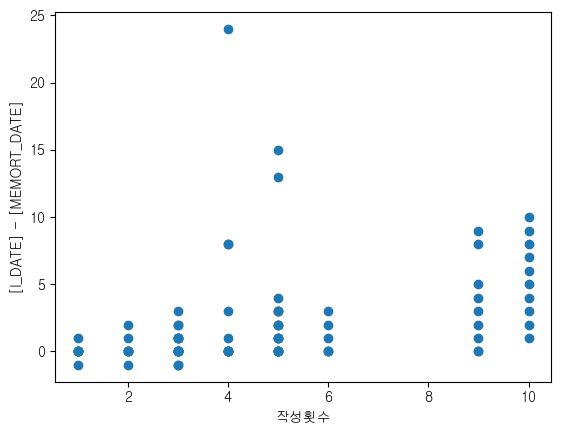

In [102]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

diff = [y-x for x,y in zip(day_memory,day_date)]
plt.scatter(y = diff,x = data_new['count'])
plt.xlabel('작성횟수')
plt.ylabel('[I_DATE] - [MEMORT_DATE]')

In [103]:
diff = pd.DataFrame(diff,columns = ['diff'])

data_new= pd.concat([data_new,diff],axis = 1)

In [104]:
#작성횟수별 평균
data_new.groupby('count')['diff'].mean()

count
1     0.000000
2     0.250000
3     0.370370
4     3.666667
5     2.550000
6     1.000000
9     3.555556
10    5.500000
Name: diff, dtype: float64

* `diff`에 따른 count 횟수 차이는 보이지 않음음

In [124]:
sum(data_new['diff'] == 0)

47

In [129]:
data_diff_0 = data_new[data_new['diff'] == 0]
data_diff_1 = data_new[data_new['diff'] != 0]

(array([6., 3., 8., 2., 0., 4., 1., 0., 0., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

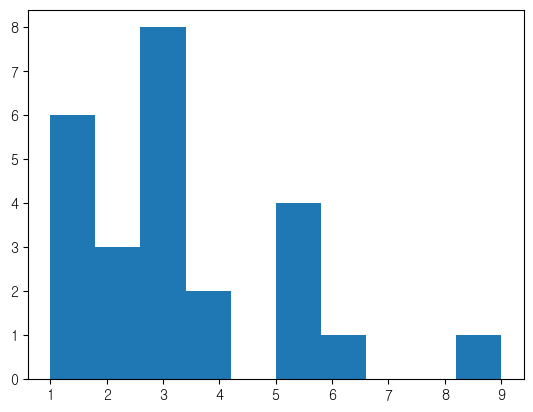

In [133]:
plt.hist(data_diff_0.groupby('WRITER')['count'].mean())

(array([2., 2., 6., 2., 4., 1., 0., 0., 1., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

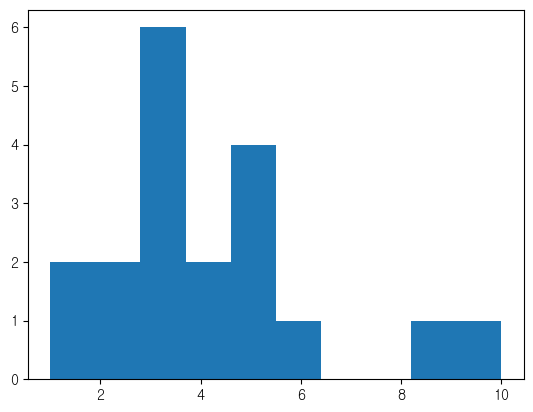

In [135]:
plt.hist(data_diff_1.groupby('WRITER')['count'].mean())

### 2) `QUESTION`

#### (1) 작성자별 QUESTION 특징

1. 작성자별 QUESTION 수치 편차 큼
2. 작성자별 QUESTION 수치 대체로 일정함


* QUESTION 평균 수치 나타낸 히스토그램
  -  대부분 500대의 값


Text(0.5, 1.0, 'QUESTION 평균수치')

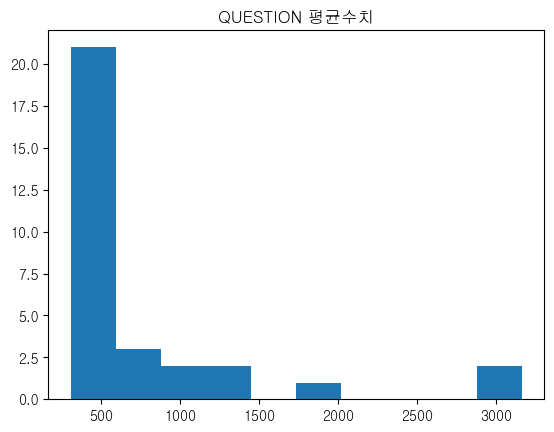

In [116]:
data_que = data_new.groupby("WRITER")['QUESTION'].mean().sort_values()

plt.hist(data_que)
plt.title('QUESTION 평균수치')

* `QUESTION`값이 가장 **높은** 작성자 => *꾸준히 매일 작성 + 비슷한 QUESITON 수치*

In [120]:
data_new.groupby("WRITER")['QUESTION'].max().sort_values(ascending= False)

WRITER
884    3164
890    3163
772    3162
933    1925
952    1325
659    1066
713     937
944     781
473     667
461     631
951     569
603     522
184     512
28      500
537     498
684     477
714     468
808     415
796     413
687     413
568     399
706     392
887     378
844     369
746     364
907     357
930     355
916     350
938     349
875     339
914     309
Name: QUESTION, dtype: int64

In [122]:
data_new[data_new.WRITER == '884']

,MEMORY_ID,WRITER,MEMORY_DATE,IS_PRINTED,I_DATE,U_DATE,QUESTION,count,diff
10,4003,884,2023-10-27,0,2023-10-27,2023-10-27 04:16:30,3164,4,0
39,3974,884,2023-10-26,0,2023-10-26,2023-10-26 01:02:00,3161,4,0
65,3948,884,2023-10-25,0,2023-10-25,2023-10-25 01:22:33,3160,4,0
97,3916,884,2023-10-24,0,2023-10-24,2023-10-24 12:08:44,3159,4,0


* QUESTION이 가장 작은 작성자

In [353]:
data[data.WRITER == '914']

,MEMORY_ID,WRITER,MEMORY_DATE,IS_PRINTED,I_DATE,U_DATE,USE_YN,QUESTION
2,4011,914,2023-10-27,0,2023-10-27,2023-10-27 05:56:23,1,309
3,4010,914,2023-10-26,0,2023-10-27,2023-10-27 05:54:41,1,308
4,4009,914,2023-10-25,0,2023-10-27,2023-10-27 05:53:38,1,307
5,4008,914,2023-10-24,0,2023-10-27,2023-10-27 05:52:34,1,306
6,4007,914,2023-10-23,0,2023-10-27,2023-10-27 05:51:07,1,305


=> `QUESITON` 수치가 낮다고 해서 `MEMORY_DATE`가 일정하지 않은 것은 아님

* 작성자별 QUESTION RANGE

In [136]:
data_new.groupby('WRITER')['QUESTION'].describe()[['min','max']].sort_values(by = 'min')

,min,max
WRITER,,
914,305.0,309.0
875,337.0,339.0
938,345.0,349.0
916,347.0,350.0
930,353.0,355.0
907,355.0,357.0
746,359.0,364.0
844,367.0,369.0
887,376.0,378.0


#### (2) 작성횟수와 QUESTION 관계

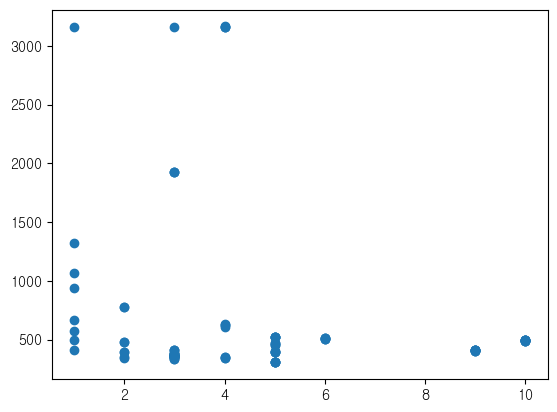

In [164]:
import matplotlib.pyplot as plt

plt.scatter(x = 'count', y = 'QUESTION', data = data_new)

=> 작성횟수와 QUESITON 수치는 큰 관련 없지만 어느정도의 outlier를 제외한다면 적은 횟수일수록 대체로 QUESTION이 큼을 알 수 있음

#### (3) `diff`와 `QUESTION`

* diff에 따른 QUESTION의 큰 차이는 보이지 않지만 diff가 0이 아닌 그룹보다 대체로 QUESTION 값이 크고 초기 사용자임을 확인할 수 있다.

-> 초기 사용자일수록 diff가 작고 QUESITON값이 큰 경향을 짐작

In [187]:
data_new['diff_01'] = ['0' if x == 0 else '1' for x in data_new['diff']]

Text(0.5, 1.0, 'diff가 0인 그룹의 count-QUESTION')

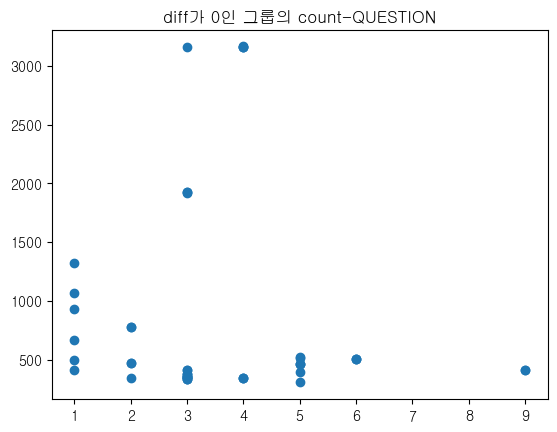

In [209]:
plt.scatter(x = 'count', y = 'QUESTION', data = data_new[data_new['diff_01'] == '0'])
plt.title('diff가 0인 그룹의 count-QUESTION')

Text(0.5, 1.0, 'diff가 1인 그룹의 count-QUESTION')

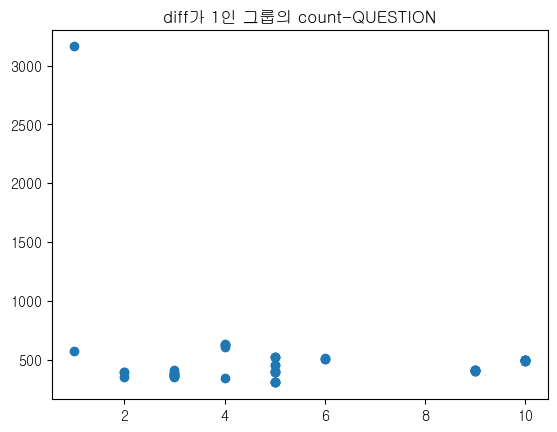

In [201]:
plt.scatter(x = 'count', y = 'QUESTION', data = data_new[data_new['diff_01'] == '1'])
plt.title('diff가 1인 그룹의 count-QUESTION')

* diff 에 따른 QUESTION 비교

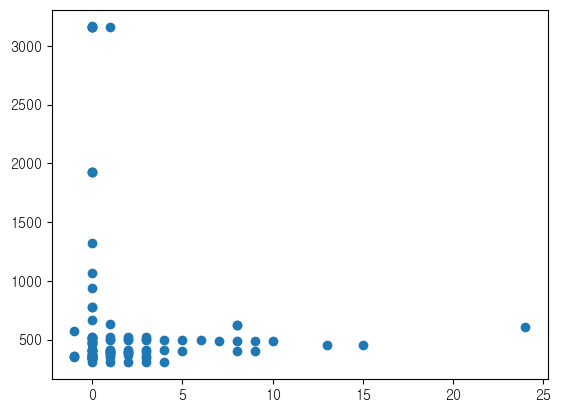

In [210]:
plt.scatter(x = 'diff', y = 'QUESTION',data = data_new)

### 3) `IS_PRINTED`

In [356]:
sum(data.IS_PRINTED == 0)

100

---
## USER data 살펴보기

In [212]:
memory = pd.read_csv('C:/Users/DaBin/Desktop/Python/DATA/기로그/raw data/memory_100.csv')
user = pd.read_csv('C:/Users/DaBin/Desktop/Python/DATA/기로그/raw data/user_100.csv')

writer = pd.read_csv('C:/Users/DaBin/Desktop/Python/DATA/기로그/raw data/memory_10.csv')

memory['WRITER'] = writer

In [213]:
writer = []
for x in memory.WRITER :
    if (x > 852) & (x <= 952) :
        writer.append(x)


In [214]:
writer = list(set(writer))
writer #user data와 공통된 WRITER list

[930, 933, 938, 875, 907, 887, 944, 914, 884, 916, 951, 952, 890]

### 1) `RELATE_SNS_ACCOUNT`

In [215]:
#대부분 AA001을 사용
user['RELATE_SNS_ACCOUNT'].value_counts()

RELATE_SNS_ACCOUNT
AA001    92
AA002     8
Name: count, dtype: int64

### 2) `EVENT_MEMORY_COUNT`

In [216]:
user['EVENT_MEMORY_COUNT'].value_counts()

EVENT_MEMORY_COUNT
0     67
1     14
2      4
5      2
7      2
17     2
14     2
3      1
10     1
4      1
6      1
12     1
16     1
22     1
Name: count, dtype: int64

In [217]:
user.groupby('RELATE_SNS_ACCOUNT')['EVENT_MEMORY_COUNT'].value_counts()

RELATE_SNS_ACCOUNT  EVENT_MEMORY_COUNT
AA001               0                     62
                    1                     13
                    2                      3
                    5                      2
                    7                      2
                    17                     2
                    16                     1
                    22                     1
                    12                     1
                    14                     1
                    10                     1
                    6                      1
                    4                      1
                    3                      1
AA002               0                      5
                    2                      1
                    1                      1
                    14                     1
Name: count, dtype: int64

## USER + MEMORY

In [220]:
memory_index = []
for x in writer :
    if x in list(memory['WRITER']) :
        memory_index.extend(memory[memory['WRITER'] == x].index)

user_index = []
for x in writer :
    if x in list(user['USER_ID']) :
        user_index.extend(user[user['USER_ID'] == x].index)


In [221]:
memory_new = data_new.iloc[memory_index]
user_new = user.iloc[user_index]

In [225]:
user_new['USER_ID'] = user_new['USER_ID'].astype(str)
memory_new['WRITER'] = memory_new['WRITER'].astype(str)

user_new.rename(columns = {'USER_ID' : 'WRITER'},inplace = True)

C:\Users\DaBin\AppData\Local\Temp\ipykernel_22492\1485144847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_new['USER_ID'] = user_new['USER_ID'].astype(str)
C:\Users\DaBin\AppData\Local\Temp\ipykernel_22492\1485144847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memory_new['WRITER'] = memory_new['WRITER'].astype(str)
C:\Users\DaBin\AppData\Local\Temp\ipykernel_22492\1485144847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [227]:
user_memory = pd.merge(memory_new,user_new,how = 'left',on = 'WRITER')[['WRITER','MEMORY_DATE','QUESTION','count','diff','diff_01','RELATE_SNS_ACCOUNT','EVENT_MEMORY_COUNT','ROLE']]

In [228]:
user_memory.head()

,WRITER,MEMORY_DATE,QUESTION,count,diff,diff_01,RELATE_SNS_ACCOUNT,EVENT_MEMORY_COUNT,ROLE
0,930,2023-10-26,355,3,0,0,AA001,7,AB002
1,930,2023-10-24,353,3,1,1,AA001,7,AB002
2,930,2023-10-25,354,3,0,0,AA001,7,AB002
3,933,2023-10-26,1925,3,0,0,AA001,3,AB002
4,933,2023-10-25,1924,3,0,0,AA001,3,AB002


* `RELATE_SNS_ACCOUNT`와 `count` : 대부분 **AA001** 

In [229]:
user_memory.groupby('WRITER')['RELATE_SNS_ACCOUNT'].value_counts()

WRITER  RELATE_SNS_ACCOUNT
875     AA001                 3
884     AA001                 4
887     AA001                 3
890     AA001                 1
907     AA001                 3
914     AA001                 5
916     AA001                 2
930     AA001                 3
933     AA001                 3
938     AA001                 4
944     AA002                 2
951     AA001                 1
952     AA001                 1
Name: count, dtype: int64

* **938**을 제외하고는 대체로 높은 `EVENT_MEMORY_COUNT`는 높은 `COUNT`를 보임

In [238]:
user_memory.groupby('EVENT_MEMORY_COUNT')['WRITER'].value_counts()

EVENT_MEMORY_COUNT  WRITER
1                   951       1
                    952       1
2                   944       2
3                   933       3
4                   907       3
5                   938       4
6                   890       1
7                   930       3
                    916       2
10                  914       5
14                  875       3
16                  887       3
17                  884       4
Name: count, dtype: int64